In [96]:
#loding necessary libraries for data analysis
library(tidyverse)

In [97]:
#readind the data set in csv format for this case
df <- read.csv('train.csv')
attach(df)
head(df , 3)

The following objects are masked from df (pos = 3):

    Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex,
    SibSp, Survived, Ticket


The following objects are masked from df (pos = 6):

    Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex,
    SibSp, Survived, Ticket




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S


In [98]:
#making blankspace into null values
df[df==""] <- NA

In [99]:
#getting the number of rows
nrow(df)

[1] 891

In [100]:
#getting summary of the dataset
summary(df)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [101]:
#cheking for null values in the dataset
colSums(is.na(df))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

In [102]:
#droping columns with null values that are less than 5
df <- df %>% drop_na(Embarked)


In [103]:
#cheking the number of rows in the dataset
nrow(df)

[1] 889

In [104]:
#cheking if null values still exist
data.frame( colSums(is.na(df)))

,colSums.is.na.df..
,<dbl>
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0


In [105]:
#droping columns that wont be needed when porforming data analysis
df <- df %>% select(-c(Cabin , Name , Ticket , PassengerId))
data_store <- df
head(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,NA,0,0,8.4583,Q


In [106]:
#replacing null values with the median value
df$Age[is.na(df$Age)] <- median(df$Age , na.rm = T)

colSums(is.na(df))

Survived   Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
       0        0        0        0        0        0        0        0

In [107]:
#creating a function to chek for the median value
getmode <- function(v){
    uniq = unique(v)
    uniq[which.max(tabulate(match(v , uniq)))]
}


print(getmode(df$Age))

[1] 28


In [108]:
#cheking coloum names

colnames(df)

[1] "Survived" "Pclass"   "Sex"      "Age"      "SibSp"    "Parch"    "Fare"    
[8] "Embarked"

In [109]:
head(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,28,0,0,8.4583,Q


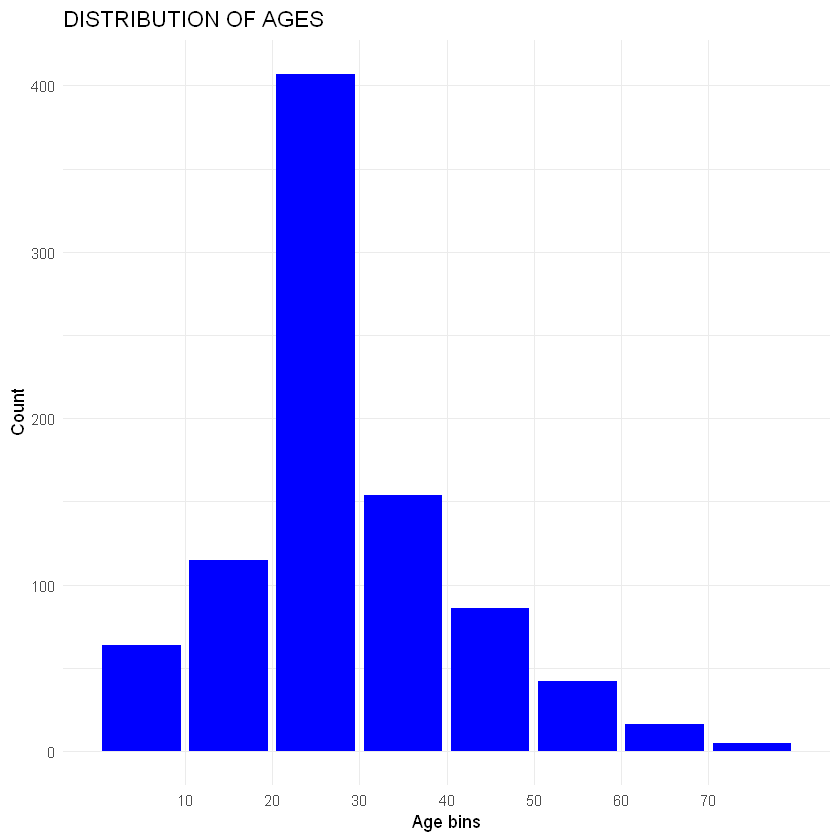

In [110]:
ggplot(df, aes(Age)) +
  geom_bar(fill = 'blue') +
  scale_x_binned() +
  labs(title = "DISTRIBUTION OF AGES" , x = 'Age bins' , y = 'Count')+
  theme_minimal()

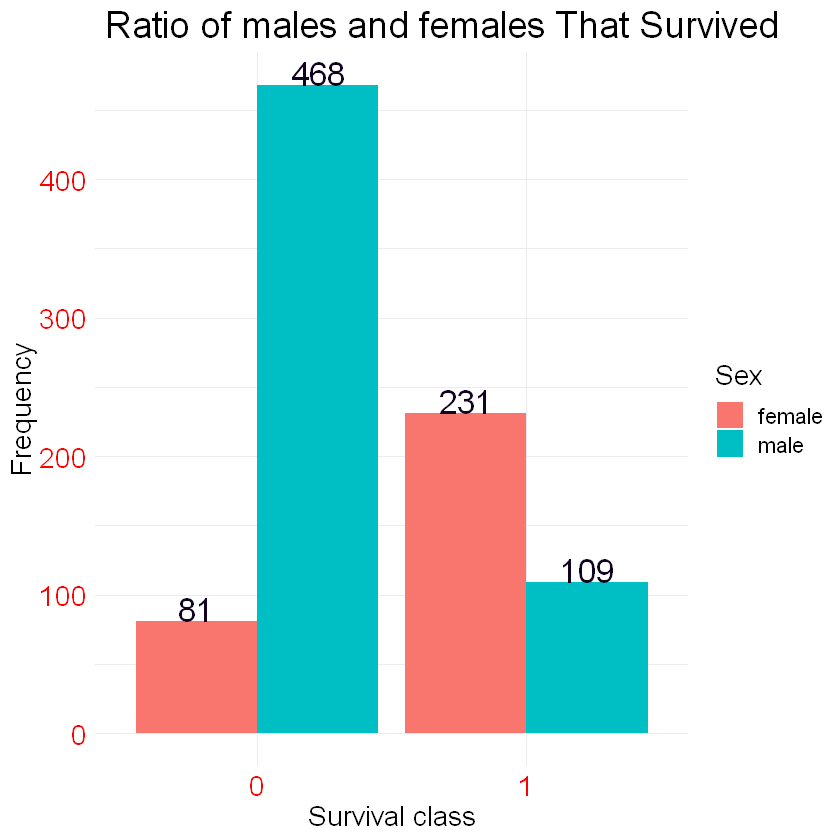

In [111]:
#creating a grouped bar graph 
ggplot(df, aes(factor(Survived), fill = Sex)) +     
  geom_bar(position = 'dodge')+
  theme_minimal()+
  geom_text(aes(label =after_stat(count)), stat = "count", vjust = 0, colour = "#110420" , position =  position_dodge(0.9) , size = 7)+
  labs(title = " Ratio of males and females That Survived" , x = 'Survival class' , y = 'Frequency')+
  theme(
    plot.title = element_text(size = rel(2)),
    axis.title = element_text(size = rel(1.5)),
    axis.text = element_text(size = rel(1.5) , color = 'red'),
    legend.text = element_text(size = rel(1.2)),
    legend.title = element_text(size = rel(1.5)),
  )

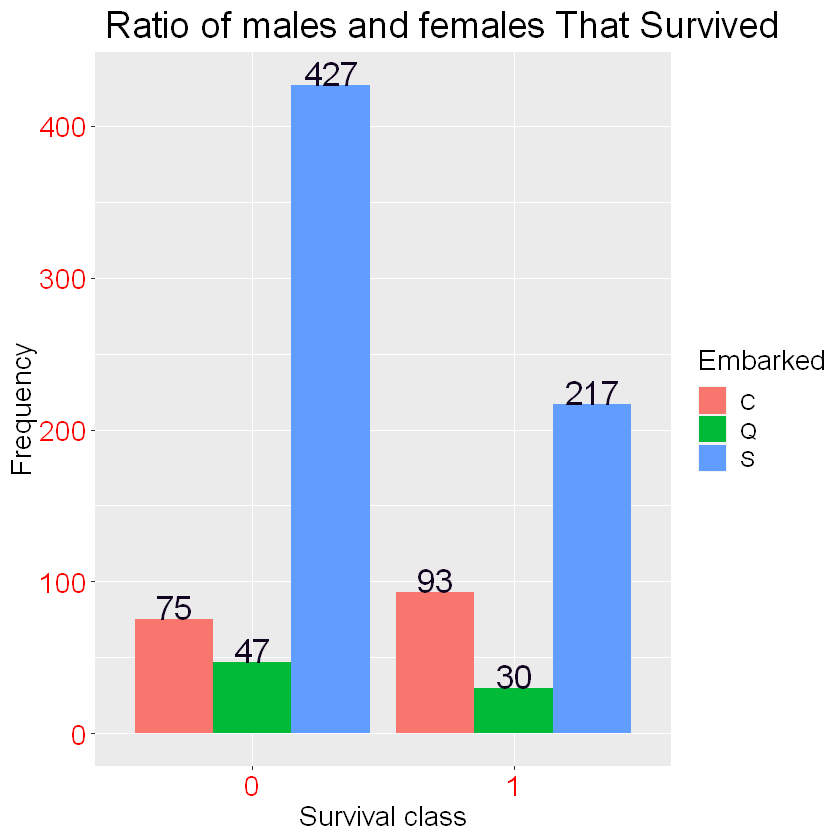

In [112]:
#creating a grouped bar graph 
ggplot(df, aes(factor(Survived), fill = Embarked)) +     
  geom_bar(position = 'dodge')+
  geom_text(aes(label =after_stat(count)), stat = "count", vjust = 0, colour = "#110420" , position =  position_dodge(0.9) , size = 7)+
  labs(title = " Ratio of males and females That Survived" , x = 'Survival class' , y = 'Frequency')+
  theme(
    plot.title = element_text(size = rel(2)),
    axis.title = element_text(size = rel(1.5)),
    axis.text = element_text(size = rel(1.5) , color = 'red'),
    legend.text = element_text(size = rel(1.2)),
    legend.title = element_text(size = rel(1.5)),
    plot.background = element_rect(fill = "white")
  )

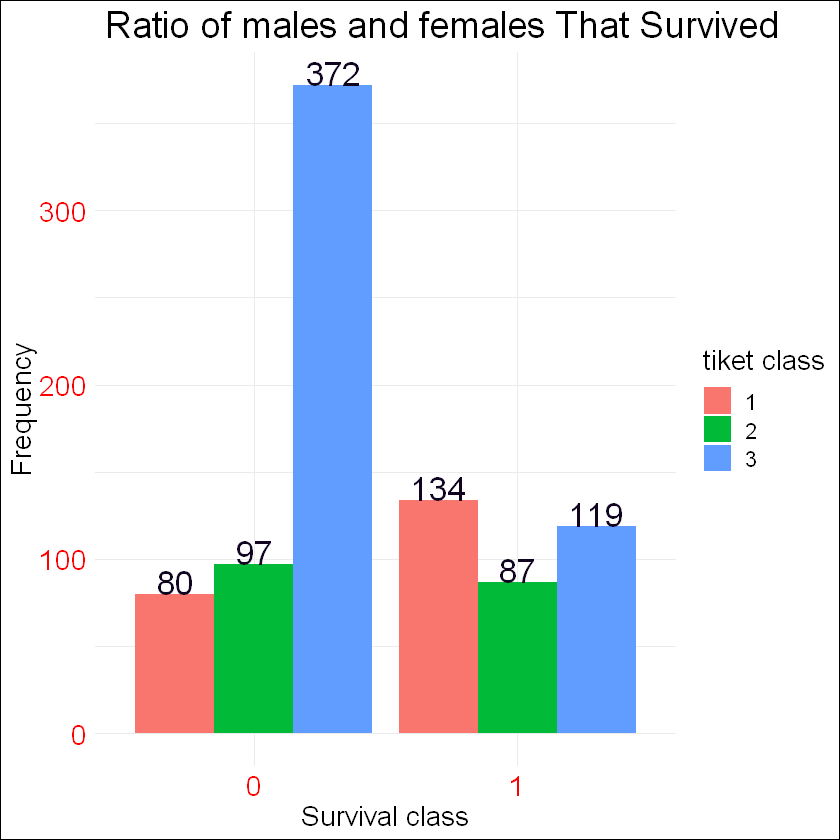

In [113]:
#creating a grouped bar graph 
ggplot(df, aes(factor(Survived), fill = factor(Pclass))) +     
  geom_bar(position = 'dodge')+
  theme_minimal()+
  geom_text(aes(label =after_stat(count)), stat = "count", vjust = 0, colour = "#110420" , position =  position_dodge(0.9) , size = 7)+
  labs(title = " Ratio of males and females That Survived" , x = 'Survival class' , y = 'Frequency')+
  theme(
    plot.title = element_text(size = rel(2)),
    axis.title = element_text(size = rel(1.5)),
    axis.text = element_text(size = rel(1.5) , color = 'red'),
    legend.text = element_text(size = rel(1.2)),
    legend.title = element_text(size = rel(1.5)),
    plot.background = element_rect(fill = "white")
  )+
  guides(fill = guide_legend(title = "tiket class"))

In [114]:
unique(Embarked)

[1] "S" "C" "Q" ""

In [115]:
#Perform onehot encording
df <- mutate(df , sex_female = ifelse(Sex == 'female', 1,0))
df <- mutate(df , sex_male = ifelse(Sex == 'male', 1,0))
df <- mutate(df , Ebarked_s = ifelse(Embarked == 'S', 1,0))
df <- mutate(df , Ebarked_c = ifelse(Embarked == 'C', 1,0))
df <- mutate(df , Ebarked_q = ifelse(Embarked == 'Q', 1,0))

df <- df %>% select(-c(Sex , Embarked))
head(df)


,Survived,Pclass,Age,SibSp,Parch,Fare,sex_female,sex_male,Ebarked_s,Ebarked_c,Ebarked_q
,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,3,22,1,0,7.2500,0,1,1,0,0
2,1,1,38,1,0,71.2833,1,0,0,1,0
3,1,3,26,0,0,7.9250,1,0,1,0,0
4,1,1,35,1,0,53.1000,1,0,1,0,0
5,0,3,35,0,0,8.0500,0,1,1,0,0
6,0,3,28,0,0,8.4583,0,1,0,0,1


In [116]:
colnames(df)

[1] "Survived"   "Pclass"     "Age"        "SibSp"      "Parch"     
 [6] "Fare"       "sex_female" "sex_male"   "Ebarked_s"  "Ebarked_c" 
[11] "Ebarked_q"

In [117]:
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.8,0.2))
data_train  <- df[sample, ]
data_test   <- df[!sample, ]


In [118]:
#cheking  probabilities of survival in data_train
prop.table(table(data_train$Survived))


        0         1 
0.6151685 0.3848315 

In [119]:
#cheking  probabilities of survival in data_test
prop.table(table(data_test$Survived))


        0         1 
0.6271186 0.3728814 

In [120]:
#spliting the data into test and trining variables 
X_train <- data.frame(data_train %>% select(-c(Survived)))
y_train  <- data.frame( data_train$Survived)
X_test <- data.frame(data_test %>% select(-c(Survived)))
y_test  <- data.frame( data_test$Survived)


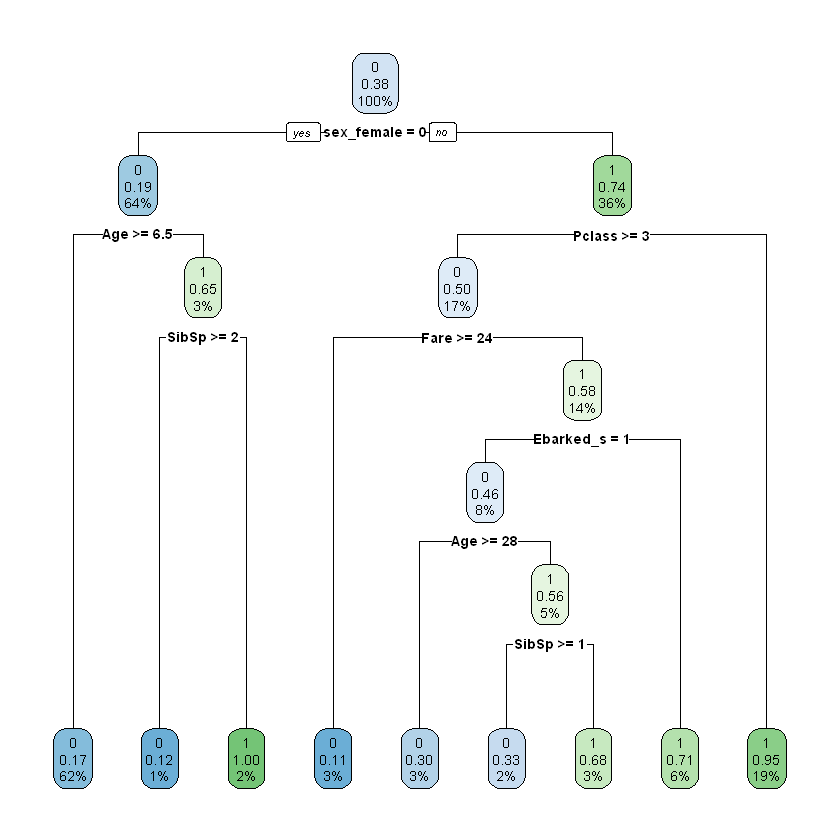

In [121]:
#fiting a model with a clasification decision trees
library(rpart)
library(rpart.plot)

model_fit <- rpart(Survived~. , data = data_train , method = 'class')
rpart.plot(model_fit , extra = 106)


In [122]:
predictions <- predict(model_fit , data_test , type = 'class')
table_mat <- table(data_test$Survived , predictions)
table_mat

   predictions
      0   1
  0 104   7
  1  26  40

In [123]:
mat_df <-  as_tibble(data.frame(table_mat ))
mat_df

Var1,predictions,Freq
<fct>,<fct>,<int>
0,0,104
1,0,26
0,1,7
1,1,40


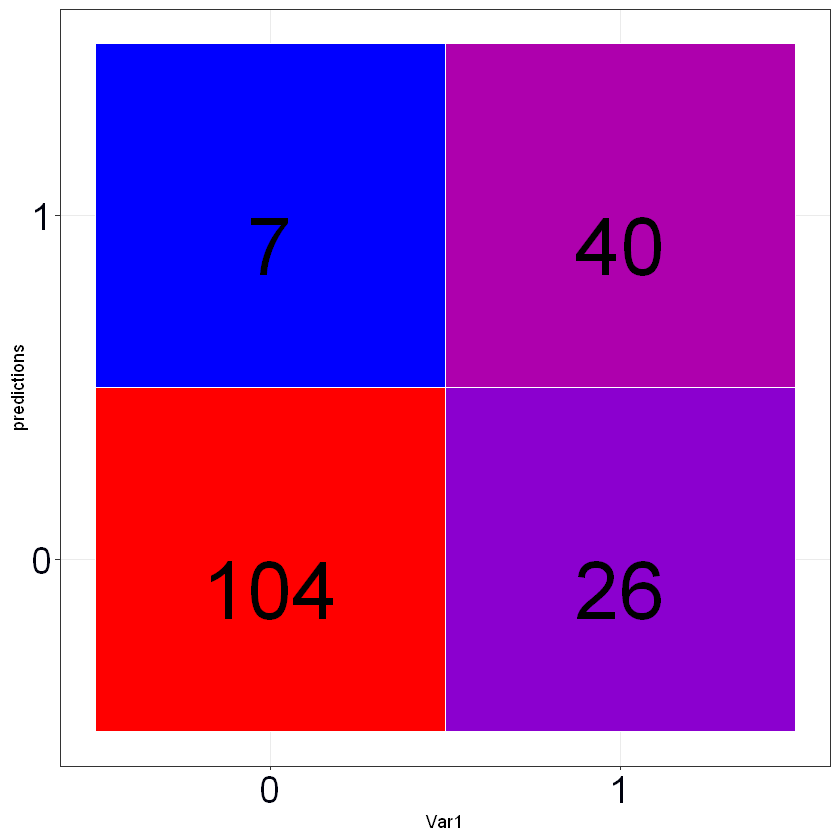

In [124]:
library(ggplot2)
ggplot(data =  mat_df, mapping = aes(x = Var1, y = predictions)) +
  geom_tile(aes(fill = Freq), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Freq)), vjust = 1 , size = 17) +
  scale_fill_gradient(low = "blue", high = "red") +
  theme_bw() + theme(legend.position = "none" , axis.text = element_text(size = rel(2) , color = '#00020e'))

In [125]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

accuracy_Test

[1] 0.8135593

In [126]:
#paremeter turning 
accuracy_tune <- function(model_fit) {
    predictions <- predict(model_fit, data_test, type = 'class')
    table_mat <- table(data_test$Survived, predictions)
    accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
    accuracy_Test
}

control <- rpart.control(minsplit = 1,
    minbucket = round(1 / 3),
    maxdepth = 3,
    cp = 0)
tune_fit <- rpart(Survived~., data = data_train, method = 'class', control = control)
accuracy_tune(tune_fit)


[1] 0.819209

In [127]:
#parameter turning
previous_accuracy <- 0
for (x in 1:10) {
  for(y in 1:30){
    for(z in 1:10){
        control <- rpart.control(minsplit = x,
        minbucket = round(z / 3),
        maxdepth = y,
        cp = 0)
        tune_fit <- rpart(Survived~., data = data_train, method = 'class', control = control)
        accuracy <- accuracy_tune(tune_fit)
        if(accuracy > previous_accuracy){
            print(paste(round(accuracy, 3) , 'minisplit = ' , x , 'maxdepth = ' , y , 'minibucket =' , z))
            previous_accuracy <- accuracy
        }   
    }
  }
}

[1] "0.785 minisplit =  1 maxdepth =  1 minibucket = 1"
[1] "0.797 minisplit =  1 maxdepth =  2 minibucket = 1"
[1] "0.819 minisplit =  1 maxdepth =  3 minibucket = 1"
[1] "0.825 minisplit =  1 maxdepth =  3 minibucket = 5"
[1] "0.836 minisplit =  1 maxdepth =  8 minibucket = 8"


In [128]:
control <- rpart.control(minsplit = 1,
    minbucket = round(8 / 3),
    maxdepth = 8,
    cp = 0)
model_fit <- rpart(Survived~., data = data_train, method = 'class', control = control)
accuracy_tune(model_fit)

[1] 0.8361582

In [129]:
# getting predictions
y_pre <- data.frame(predict(model_fit , X_test , type = 'class'))

colnames(y_pre) <- c('pred')

head(y_pre)


,pred
,<fct>
4,1
6,0
7,0
18,0
21,0
29,1


In [130]:
table_mat <- table(data_test$Survived , y_pre$pred)
table_mat

   
      0   1
  0 104   7
  1  22  44

In [131]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)

accuracy_Test

[1] 0.8361582

## lets also try xgboost for r and seen if there is any changes

In [132]:
#spliting the data into test and trining variables 
X_train <- as.matrix(data.frame(data_train %>% select(-c(Survived))))
y_train  <- as.matrix(data.frame( data_train$Survived))
X_test <- as.matrix(data.frame(data_test %>% select(-c(Survived))))
y_test  <- as.matrix(data.frame( data_test$Survived))


In [133]:
#preparing data for ggboost model
library(xgboost)
dtrain <- xgb.DMatrix(data = X_train, label= y_train)
dtest <- xgb.DMatrix(data = X_test, label= y_test)

In [134]:
xgb_model <- xgboost(data = dtrain, # the data   
                 nround = 10, # max number of boosting iterations
                 objective = "binary:logistic"  #type of the model to use by default it is regresion
                 )

[1]	train-logloss:0.556275 
[2]	train-logloss:0.478511 
[3]	train-logloss:0.428645 
[4]	train-logloss:0.395240 
[5]	train-logloss:0.371406 
[6]	train-logloss:0.351596 
[7]	train-logloss:0.333407 
[8]	train-logloss:0.321117 
[9]	train-logloss:0.309018 
[10]	train-logloss:0.301413 


In [135]:
#triying to make predictions
pred <- predict(xgb_model, dtest)

# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != y_test)
print(paste("test-error=", err))

[1] "test-error= 0.15819209039548"


In [160]:
#trying to tune the parameters so as to obtain a better model
# get the number of negative & positive cases in our data
negative_cases <- sum(y_train == 0)
postive_cases <- sum(y_train == 1)
# train a model using our training data
model_tuned <- xgboost(data = dtrain, # the data           
                 max.depth = 4, # the maximum depth of each decision tree
                 nround = 100, # number of boosting rounds
                 early_stopping_rounds = 3, # if we dont see an improvement in this many rounds, stop
                 objective = "binary:logistic", # the objective function
                 scale_pos_weight = negative_cases/postive_cases, # control for imbalanced classes
                 gamma = 0.1) # add a regularization term

# generate predictions for our held-out testing data
pred <- predict(model_tuned, dtest)

# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != y_test)
print(paste("test-error=", err))

[1]	train-logloss:0.575667 
Will train until train_logloss hasn't improved in 3 rounds.

[2]	train-logloss:0.505553 
[3]	train-logloss:0.462228 
[4]	train-logloss:0.433358 
[5]	train-logloss:0.412177 
[6]	train-logloss:0.398373 
[7]	train-logloss:0.387056 
[8]	train-logloss:0.379165 
[9]	train-logloss:0.369698 
[10]	train-logloss:0.363723 
[11]	train-logloss:0.356323 
[12]	train-logloss:0.349833 
[13]	train-logloss:0.342876 
[14]	train-logloss:0.339067 
[15]	train-logloss:0.332086 
[16]	train-logloss:0.330097 
[17]	train-logloss:0.325811 
[18]	train-logloss:0.319845 
[19]	train-logloss:0.316733 
[20]	train-logloss:0.314907 
[21]	train-logloss:0.311967 
[22]	train-logloss:0.309352 
[23]	train-logloss:0.306632 
[24]	train-logloss:0.302579 
[25]	train-logloss:0.301269 
[26]	train-logloss:0.299122 
[27]	train-logloss:0.295564 
[28]	train-logloss:0.292799 
[29]	train-logloss:0.287665 
[30]	train-logloss:0.284244 
[31]	train-logloss:0.282240 
[32]	train-logloss:0.278932 
[33]	train-logloss:0

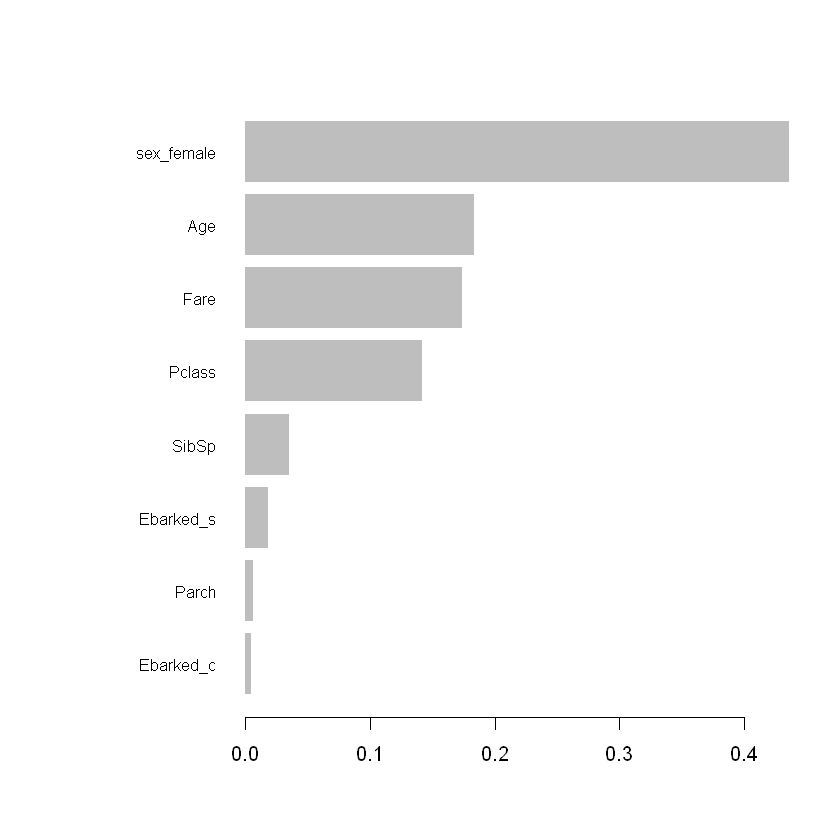

In [155]:
importance_matrix <- xgb.importance( model = model_tuned)

# and plot it!
xgb.plot.importance(importance_matrix)

In [156]:
prediction <- as.numeric(pred > 0.5)
cof_mat = table(y_test , prediction)
cof_mat

      prediction
y_test  0  1
     0 98 13
     1 17 49

In [157]:
xgb_accuracy <- sum(diag(cof_mat))/sum(cof_mat)
xgb_accuracy

[1] 0.8305085